This project analyzes a comprehensive dataset of student performance, exploring the relationships between demographic factors, socioeconomic indicators, and academic achievement. By examining variables such as gender, race/ethnicity, parental education, lunch status, and test preparation, we aim to uncover insights into what influences student scores in math, reading, and writing. Our goal is to identify trends and patterns that can inform educational strategies and policies, ultimately contributing to improved learning outcomes and educational equity.

We'll walk through loading the data, performing exploratory data analysis (EDA), visualizing the data, and conducting basic statistical analysis. I'll outline the key details and steps we should take to analyze this student performance data:

### Import Necessary Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset 

Load it into a pandas DataFrame.

In [6]:
# Load the dataset
df = pd.read_csv('Cleaned_Students_Performance.csv')

# Display the first few rows of the dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


### Basic Data Exploration 

Check for missing values and get a summary of the dataset.

In [8]:
# Check for missing values
print(df.isnull().sum())

# Get basic information about the dataset
df.info()

# Get summary statistics for numerical columns
df.describe()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score           

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


### Data Cleaning

For this example, there are no missing or incorrect values. The dataset is clean.

### Exploratory Data Analysis (EDA)

#### Distribution of Math Scores by Gender

I will create a boxplot to visualize how math scores differ between male and female students.

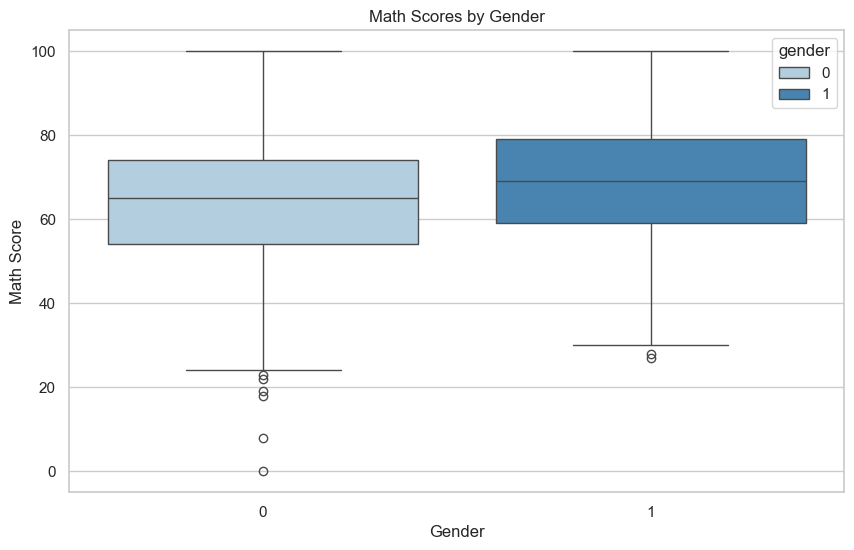

In [11]:
# Set plot style
sns.set(style = "whitegrid")

# Create a boxplot for math scores by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math_score', data=df, palette="Blues", hue="gender")
plt.title('Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

#### Distribution of Reading and Writing Scores by Gender

We can create similar plots for reading and writing scores.

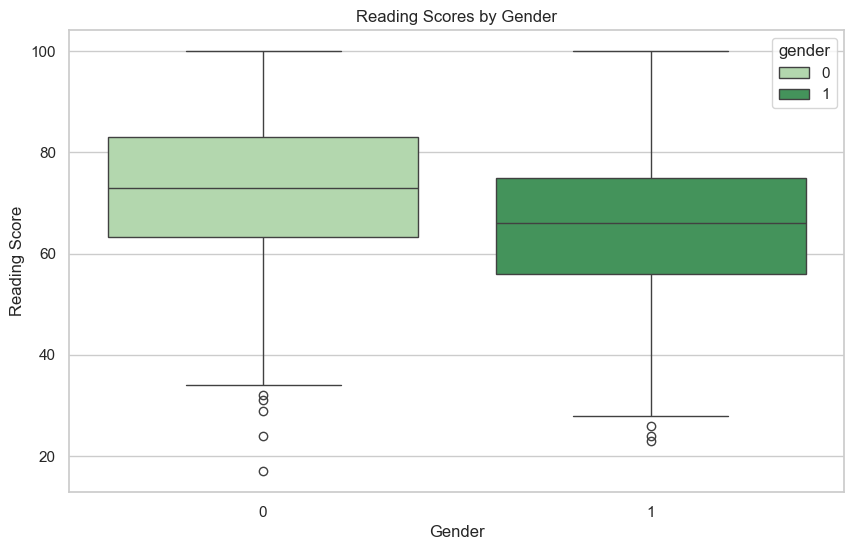

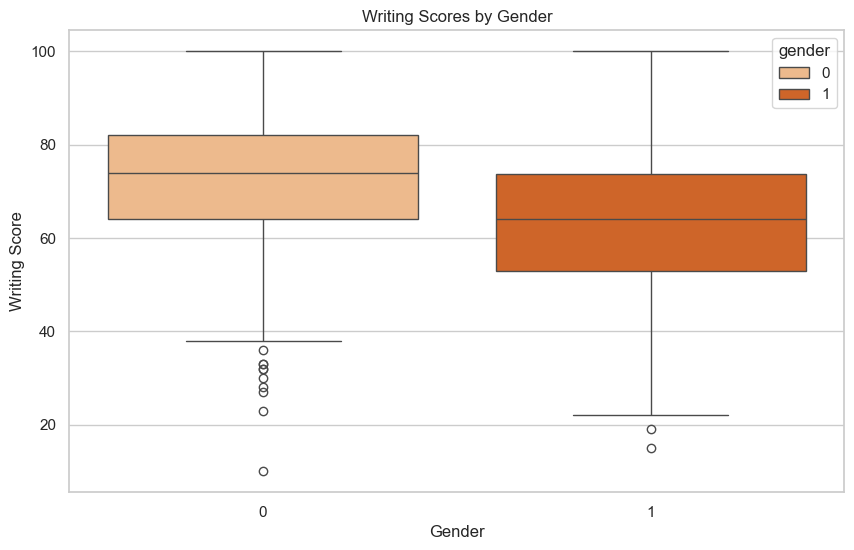

In [13]:
# Boxplot for reading scores by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='reading_score', data=df, palette="Greens", hue="gender")
plt.title('Reading Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.show()

# Boxplot for writing scores by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='writing_score', data=df, palette="Oranges", hue="gender")
plt.title('Writing Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.show()

#### Average Scores by Parental Education Level

We can also analyze how parental education level impacts student performance across all subjects.

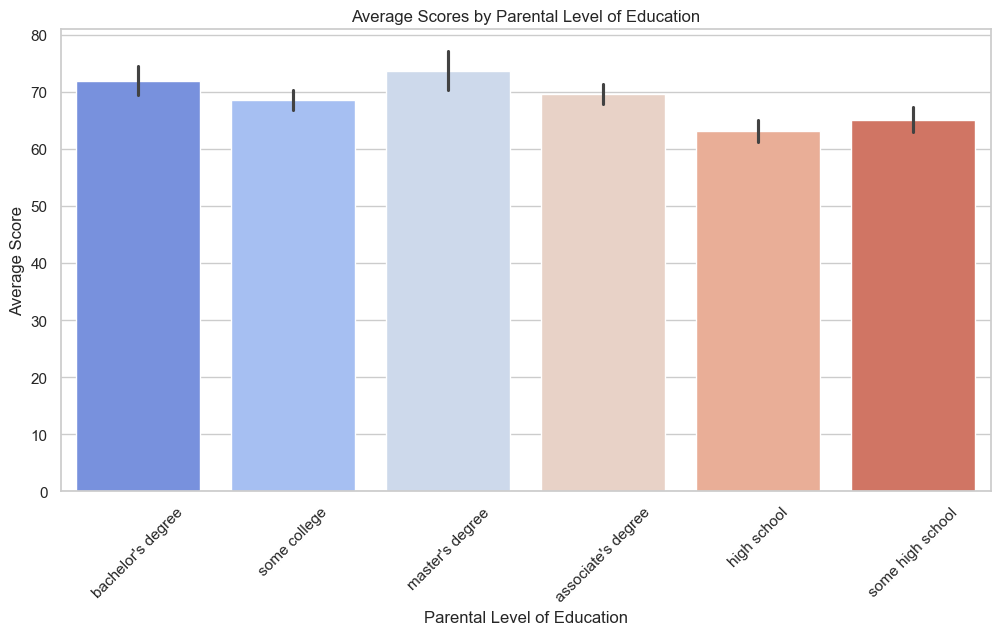

In [15]:
# Calculate average score across math, reading, and writing for each parental education level
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Bar plot of average scores by parental level of education
plt.figure(figsize=(12, 6))
sns.barplot(x='parental_level_of_education', y='average_score', data=df, palette="coolwarm", hue="parental_level_of_education", legend=False)
plt.title('Average Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

#### Impact of Lunch on Performance

Let’s see how lunch type (free/reduced vs standard) affects student performance.

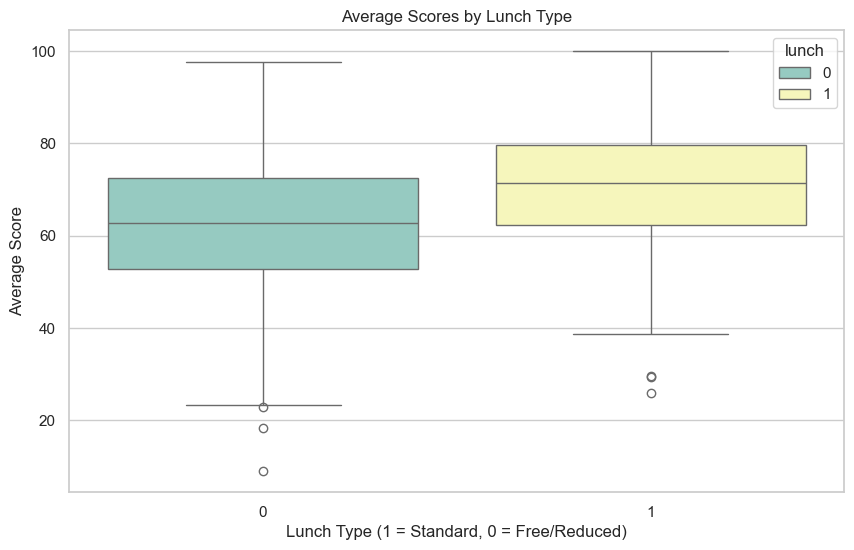

In [17]:
# Boxplot for average score based on lunch type (1 = standard lunch, 0 = free/reduced lunch)
plt.figure(figsize=(10, 6))
sns.boxplot(x='lunch', y='average_score', data=df, palette="Set3", hue="lunch")
plt.title('Average Scores by Lunch Type')
plt.xlabel('Lunch Type (1 = Standard, 0 = Free/Reduced)')
plt.ylabel('Average Score')
plt.show()

#### Impact of Test Preparation Course on Performance

We can also analyze whether completing a test preparation course has an impact on student performance.

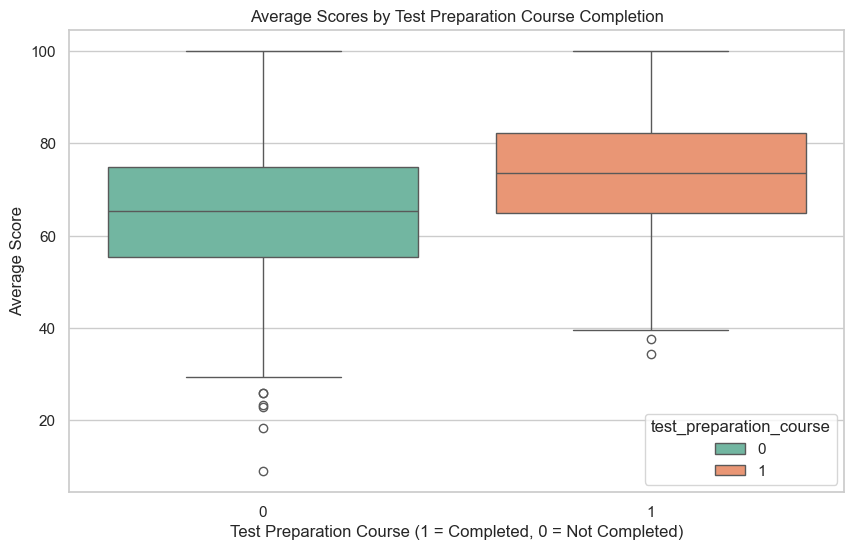

In [19]:
# Boxplot for average score based on test preparation course completion (1 = completed, 0 = not completed)
plt.figure(figsize=(10, 6))
sns.boxplot(x='test_preparation_course', y='average_score', data=df, palette="Set2", hue="test_preparation_course")
plt.title('Average Scores by Test Preparation Course Completion')
plt.xlabel('Test Preparation Course (1 = Completed, 0 = Not Completed)')
plt.ylabel('Average Score')
plt.show()

### Correlation Analysis

We can examine the correlation between the relevent columns:

                           gender     lunch  test_preparation_course  \
gender                   1.000000  0.021372                 0.006028   
lunch                    0.021372  1.000000                -0.017044   
test_preparation_course  0.006028 -0.017044                 1.000000   
math_score               0.167982  0.350877                 0.177702   
reading_score           -0.244313  0.229560                 0.241780   
writing_score           -0.301225  0.245769                 0.312946   
total_score             -0.130861  0.290064                 0.256710   
average_score           -0.130861  0.290064                 0.256710   

                         math_score  reading_score  writing_score  \
gender                     0.167982      -0.244313      -0.301225   
lunch                      0.350877       0.229560       0.245769   
test_preparation_course    0.177702       0.241780       0.312946   
math_score                 1.000000       0.817580       0.802642   
readin

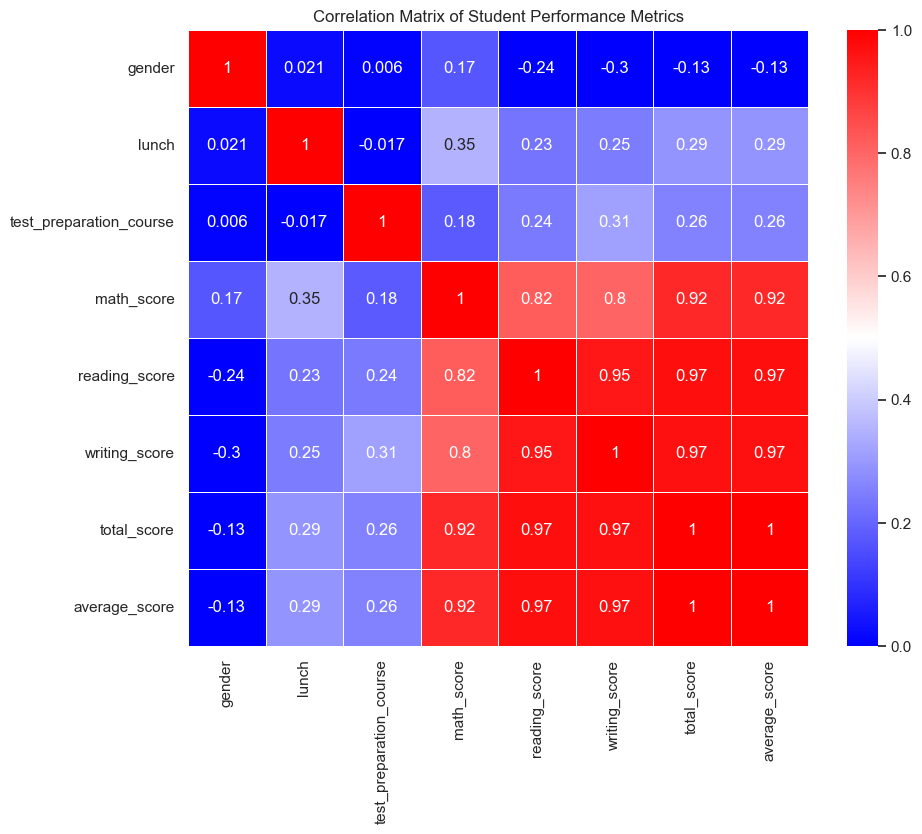

In [21]:
# Calculate correlation matrix for relevant columns
correlation_matrix = df[['gender', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']].corr()

# Display correlation matrix
print(correlation_matrix)

# Set up matplotlib figure for heatmap
plt.figure(figsize=(10, 8))

# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', vmin=0, vmax=1, linewidths=0.5)

# Add title and show plot
plt.title('Correlation Matrix of Student Performance Metrics')
plt.show()

### Statistical Analysis

#### T-Test: Comparing Math Scores Between Genders

To statistically compare math scores between male and female students:

In [23]:
from scipy import stats

# Separate math scores by gender
male_math_scores = df[df['gender'] == 1]['math_score']
female_math_scores = df[df['gender'] == 0]['math_score']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(male_math_scores, female_math_scores)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 5.383245869828983, P-value: 9.120185549328822e-08


#### ANOVA: Comparing Scores Across Parental Education Levels

To see if there’s a significant difference in average scores across different parental education levels:

In [25]:
anova_result = stats.f_oneway(
    df[df['parental_level_of_education'] == "high school"]['average_score'],
    df[df['parental_level_of_education'] == "associate's degree"]['average_score'],
    df[df['parental_level_of_education'] == "bachelor's degree"]['average_score'],
    df[df['parental_level_of_education'] == "master's degree"]['average_score'],
    df[df['parental_level_of_education'] == "some college"]['average_score'],
    df[df['parental_level_of_education'] == "some high school"]['average_score']
)

print(f"ANOVA result: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}")

ANOVA result: F-statistic = 10.75314696233657, P-value = 4.381046480943151e-10


### Predictive Model (Linear Regression)

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Define features (X) and target variable (y)
X = df[['math_score', 'reading_score', 'writing_score']]  # Features
y = df['total_score']  # Target variable (total score)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 3.4664000502432566e-14
R-squared (R²): 1.0


#### Visualize Predictions vs Actual Outcomes

Create a scatter plot with a diagonal line representing perfect predictions.

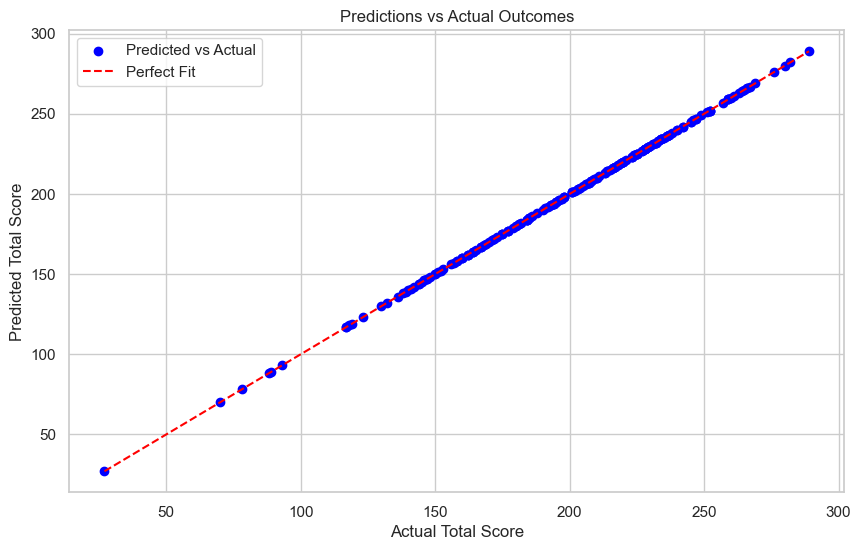

In [30]:
# Plot actual vs predicted total scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

# Add labels and title to the plot
plt.xlabel('Actual Total Score')
plt.ylabel('Predicted Total Score')
plt.title('Predictions vs Actual Outcomes')
plt.legend()

# Show plot
plt.show()

### Conclusion

Based on the analysis of the student performance dataset, we can draw the following key conclusions:

1. Demographic and socioeconomic factors such as gender, race/ethnicity, parental education level, and lunch status show some influence on student performance.
2. Completing a test preparation course generally leads to improved scores across subjects.
3. There are strong positive correlations between math, reading, and writing scores, suggesting that students who excel in one subject are likely to perform well in others.
4. The predictive model demonstrates high accuracy in forecasting total scores based on individual subject performance.
5. Factors like parental education and economic status (indicated by lunch type) appear to have a significant impact on academic outcomes.

These insights provide a foundation for developing targeted educational strategies to improve student performance and address potential disparities in academic achievement.